In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Some information about the data

In [2]:
df = pd.read_csv("indian_food.csv", na_values = -1)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [3]:
df.shape

(255, 9)

In [4]:
df.describe()

,prep_time,cook_time
count,225.000000,227.000000
mean,35.386667,38.911894
std,76.241081,49.421711
min,5.000000,2.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


### Data visualization

In [5]:
import seaborn as sns

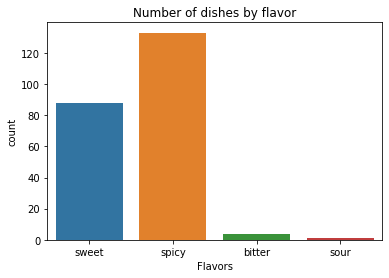

In [6]:
ax = sns.countplot(x = 'flavor_profile', data = df)
ax.set_title("Number of dishes by flavor")
ax.set_xlabel("Flavors")
plt.show()

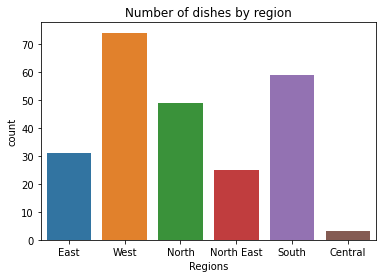

In [7]:
ax = sns.countplot(x = 'region', data = df)
ax.set_title("Number of dishes by region")
ax.set_xlabel("Regions")
plt.show()

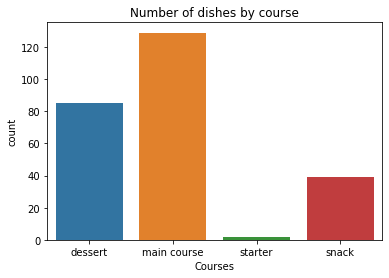

In [8]:
ax = sns.countplot(x = 'course', data = df)
ax.set_title("Number of dishes by course")
ax.set_xlabel("Courses")
plt.show()

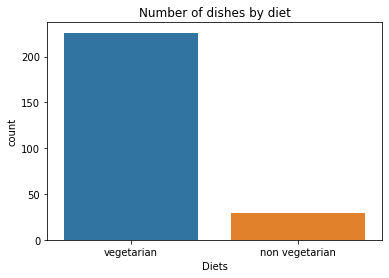

In [9]:
ax = sns.countplot(x = 'diet', data = df)
ax.set_title("Number of dishes by diet")
ax.set_xlabel("Diets")
plt.show()

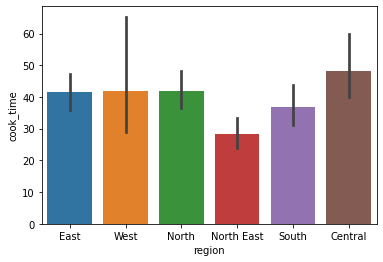

In [10]:
sns.barplot(data=df, x="region", y="cook_time")
plt.show()

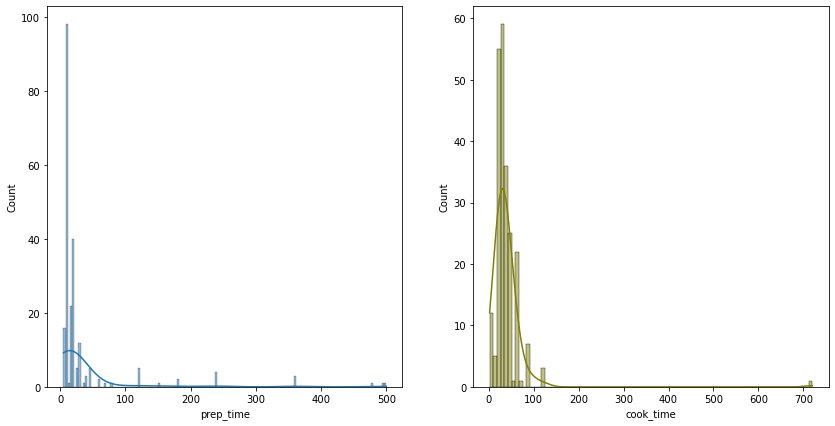

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.histplot(data = df, x = 'prep_time', kde = True, ax =ax[0])
sns.histplot(data = df, x = 'cook_time', color ="olive", kde = True, ax=ax[1])
plt.show()

In [12]:
def draw_boxplots(x_val, xlab):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
    ax[0].set_yscale("log")
    sns.boxplot(data = df, x =x_val, y="prep_time", palette='vlag', ax=ax[0])
    sns.boxplot(data = df, x =x_val, y="cook_time", palette='vlag', ax=ax[1])
    ax[0].set_ylabel("Prep time (log scale)")
    ax[0].set_xlabel(xlab)
    ax[0].set_title("Preparation time by " + xlab)
    ax[1].set_ylabel("Cook time (log scale)")
    ax[1].set_xlabel(xlab)
    ax[1].set_title("Cooking time by "+ xlab)
    plt.show()

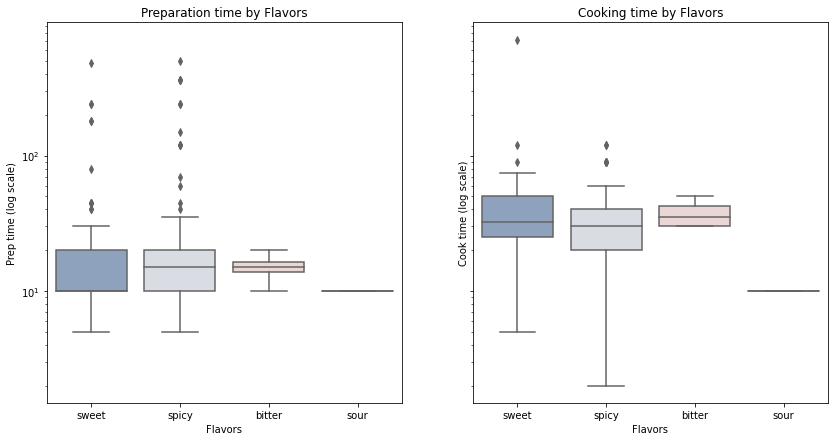

In [13]:
draw_boxplots("flavor_profile", "Flavors")

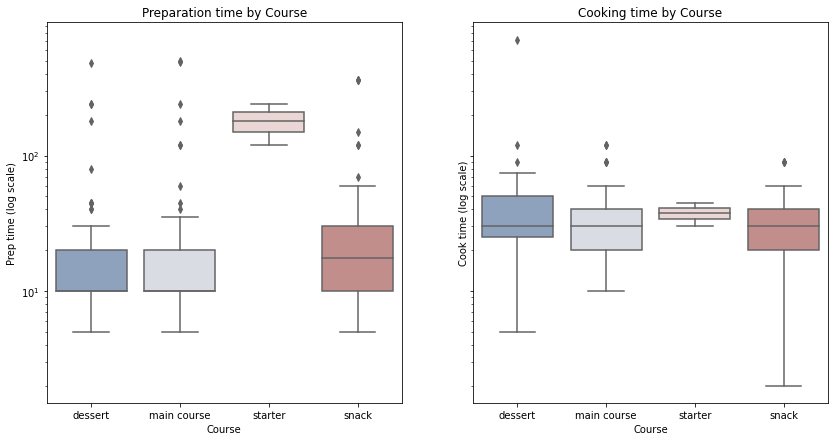

In [14]:
draw_boxplots("course", "Course")

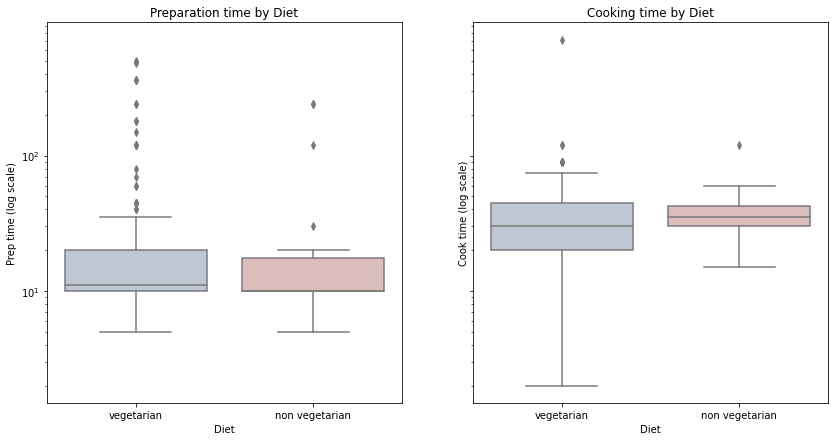

In [15]:
draw_boxplots("diet", "Diet")

### Missing data

In [16]:
df.isnull().mean() * 100

name               0.000000
ingredients        0.000000
diet               0.000000
prep_time         11.764706
cook_time         10.980392
flavor_profile    11.372549
course             0.000000
state              9.411765
region             5.490196
dtype: float64

In [17]:
# since the data is skewed, we use mode to impute the missing data in prep_time
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2 = df.copy()
df2.drop(['state', 'region'], axis=1, inplace=True)
df2.dropna(subset=['cook_time'], inplace=True)
df2['prep_time'] = imp.fit_transform(df2['prep_time'].values.reshape(-1, 1))
print(df2.isnull().mean() * 100)
print(df2.shape)

name               0.000000
ingredients        0.000000
diet               0.000000
prep_time          0.000000
cook_time          0.000000
flavor_profile    10.572687
course             0.000000
dtype: float64
(227, 7)


### One-hot encode categorical data

In [18]:
# preprocess ingredients columns
df_train = df2.copy()
df_train['is_vegetarian'] = df_train['diet'].map({'vegetarian': 1, 'non vegetarian' : 0}).astype('object')
df_train.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,is_vegetarian
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,1
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,1
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,1
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,1
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,1


In [19]:
df_train = df_train.reset_index(drop=True)

In [20]:
# discretize cook_time
bins = [0, 30, 60, 720]
group_names = ['quick', 'medium', 'slow']
df_train['cook_time'] = pd.cut(df_train['cook_time'], bins, labels=group_names)

In [21]:
df_train['cook_time'].value_counts()

quick     131
medium     84
slow       12
Name: cook_time, dtype: int64

In [22]:
# feature encoding for ingredients
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df_train['ingredients'])
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
pd.DataFrame(denselist, columns=feature_names)

,acid,all,almond,almonds,aloo,alum,amaranth,amchur,and,anise,...,whipping,white,whole,wild,wine,yam,yellow,yoghurt,yogurt,yolks
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531785,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.355991,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
223,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
224,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
225,0.0,0.359378,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.459796


In [24]:
dummies = pd.DataFrame(denselist, columns=feature_names)

In [25]:
# one hot encoding the flavors
one_hot_encode_data = pd.get_dummies(df_train, columns=['flavor_profile', 'course'])

In [26]:
one_hot_encode_data = one_hot_encode_data.join(dummies.add_prefix('ingre_'))
one_hot_encode_data.drop(['ingredients', 'diet', 'name'], axis=1, inplace=True)

In [27]:
one_hot_encode_data

,prep_time,cook_time,is_vegetarian,flavor_profile_bitter,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet,course_dessert,course_main course,course_snack,...,ingre_whipping,ingre_white,ingre_whole,ingre_wild,ingre_wine,ingre_yam,ingre_yellow,ingre_yoghurt,ingre_yogurt,ingre_yolks
0,45.0,quick,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531785,0.000000
1,80.0,quick,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,15.0,medium,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,15.0,quick,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,15.0,medium,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,15.0,medium,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
223,10.0,quick,1,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
224,5.0,quick,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
225,20.0,medium,1,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.459796


In [28]:
one_hot_encode_data['cook_time'] = one_hot_encode_data['cook_time'].map({'quick': 1, 'medium' : 2, 'slow':3})

In [29]:
# use KNN to impute the values for flavor profile
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
ohe_data_imputed = imputer.fit_transform(one_hot_encode_data)

### Train test split

In [30]:
train_info = pd.DataFrame(ohe_data_imputed, columns=one_hot_encode_data.columns)
train_info.head()

,prep_time,cook_time,is_vegetarian,flavor_profile_bitter,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet,course_dessert,course_main course,course_snack,...,ingre_whipping,ingre_white,ingre_whole,ingre_wild,ingre_wine,ingre_yam,ingre_yellow,ingre_yoghurt,ingre_yogurt,ingre_yolks
0,45.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531785,0.0
1,80.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,15.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,15.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,15.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [31]:
# ytrain
cook_time = one_hot_encode_data['cook_time']

In [32]:
x_full = train_info.drop('cook_time', axis=1)

### Baseline model

In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [34]:
# helper function to evaluate a model
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [35]:
model = DummyClassifier(strategy='most_frequent')
scores = evaluate_model(x_full, cook_time, model)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.577 (0.007)


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# base logistic regression model
base_logistic = LogisticRegression()
scores = evaluate_model(x_full, cook_time, base_logistic)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.617 (0.044)


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# base random forest model
base_rfc = RandomForestClassifier(random_state=0)
scores = evaluate_model(x_full, cook_time, base_rfc)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.601 (0.047)


In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
base_clf = MultinomialNB()
scores = evaluate_model(x_full, cook_time, base_clf)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.576 (0.048)


In [42]:
from sklearn.svm import SVC

In [43]:
base_svm = SVC(random_state=0)
scores = evaluate_model(x_full, cook_time, base_svm)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.583 (0.019)


### Feature engineering

In [44]:
data_copy = train_info.copy()

As we have seen before, the preparation time highly skewed to the right, with some outliers. Thus, we will bring the distribution closer to a bell-shaped normal distribution, by using box-cox transformation



In [45]:
# standardize preparation time
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox', standardize=False)
data_copy['prep_time'] = scaler.fit_transform(data_copy['prep_time'].values.reshape(-1, 1))
data_copy

,prep_time,cook_time,is_vegetarian,flavor_profile_bitter,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet,course_dessert,course_main course,course_snack,...,ingre_whipping,ingre_white,ingre_whole,ingre_wild,ingre_wine,ingre_yam,ingre_yellow,ingre_yoghurt,ingre_yogurt,ingre_yolks
0,1.463390,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531785,0.000000
1,1.509367,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1.314016,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1.314016,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1.314016,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.314016,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
223,1.227681,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
224,1.019336,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
225,1.363390,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.459796


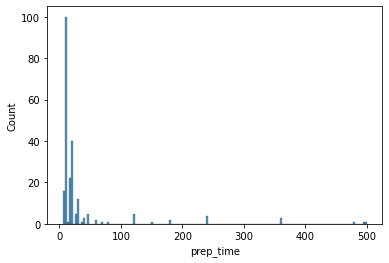

In [46]:
# the distribution before transformation
sns.histplot(data=train_info, x='prep_time')

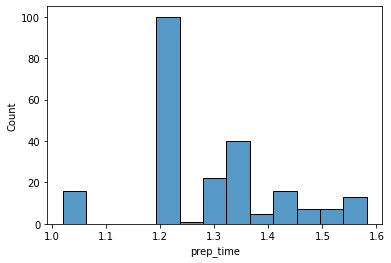

In [47]:
# the distribution post transformation
sns.histplot(data=data_copy, x='prep_time')

In [48]:
x2 = data_copy.drop('cook_time', axis=1)
y2 = data_copy['cook_time']

In [49]:
# fit the models again -- the improvement is not so significant (yet!)
logistic = LogisticRegression()
scores = evaluate_model(x2, y2, logistic)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

rfc = RandomForestClassifier(random_state=0)
scores = evaluate_model(x2, y2, rfc)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

clf = MultinomialNB()
scores = evaluate_model(x2, y2, clf)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

svm = SVC(random_state=0)
scores = evaluate_model(x2, y2, svm)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.598 (0.047)
Mean Accuracy: 0.602 (0.047)
Mean Accuracy: 0.596 (0.042)
Mean Accuracy: 0.596 (0.030)


Another problem about this dataset is that it's imbalanced. The number of slow-cooked dishes are way smaller than the other 2 categories. Thus, we are going to use a resampling method to see if fixing this problem will help improve the model as well.

In [50]:
from imblearn.over_sampling import SMOTENC

In [51]:
X_resampled, y_resampled = SMOTENC(categorical_features=range(1, 11), random_state=0, 
sampling_strategy='minority').fit_resample(x2, y2)
X_resampled, y_resampled = SMOTENC(categorical_features=range(1, 11), random_state=0, 
sampling_strategy='minority').fit_resample(X_resampled, y_resampled)

In [52]:
# fit the models again -- the improvement is not so significant (yet!)
logistic = LogisticRegression()
scores = evaluate_model(X_resampled, y_resampled, logistic)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

rfc = RandomForestClassifier(random_state=0)
scores = evaluate_model(X_resampled, y_resampled, rfc)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

clf = MultinomialNB()
scores = evaluate_model(X_resampled, y_resampled, clf)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

svm = SVC(random_state=0)
scores = evaluate_model(X_resampled, y_resampled, svm)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.768 (0.030)
Mean Accuracy: 0.785 (0.041)
Mean Accuracy: 0.645 (0.048)
Mean Accuracy: 0.750 (0.054)


### Feature selection 

By using feature selection techniques to only keep a subset of significant features, we reduce the complexity of the modeland lessen the effect of overfitting, and the model will also be less costly to be put into production. For this task, we will use 2 different feature selection methods to select the best subset of features: mutual information and chi-square, and select the technique that yields better results. Unlike chi-square, mutual information deals with datasets that have both categorical and numerical features, which is the characteristics of our dataset. However, since we only have 1 numerical feature, chi-square may still perform just as well, and we are going to examine that.

#### Mutual information

In [53]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif
discrete_feat_idx = range(1, 11)
score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx, random_state=0)
k_vals = list(np.arange(300, step=10))

In [54]:
from sklearn.feature_selection import SelectKBest
import warnings

warnings.filterwarnings("ignore")

def select_features_mutual_info(X_train, Y_train, k_val):
    fs = SelectKBest(score_func=score_func, k=k_val)
    fs.fit(X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs

<BarContainer object of 322 artists>

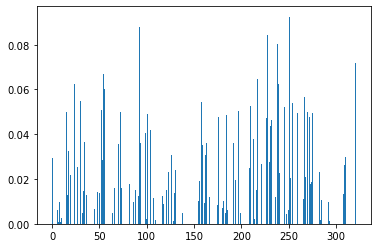

In [55]:
x_train_fs, fs = select_features_mutual_info(x_full, cook_time, 'all')
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

We only need to keep a handful features that have significant implications for the model.

#### Logistic Regression


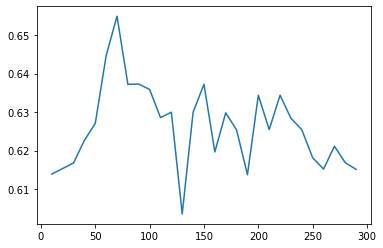

0.6548792270531401
70


In [56]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x_full, cook_time, k_val=k)
    lr_mutual_info = LogisticRegression()
    scores = evaluate_model(x_train_fs, cook_time, lr_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best is k=70

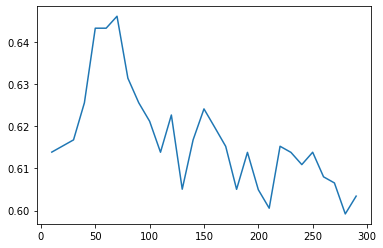

0.6460869565217391
70


In [57]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x2, y2, k_val=k)
    lr_mutual_info = LogisticRegression()
    scores = evaluate_model(x_train_fs, y2, lr_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 70

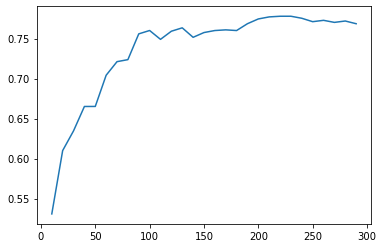

0.7778318727685818
230


In [58]:
# resampled 
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=k)
    lr_mutual_info = LogisticRegression()
    scores = evaluate_model(x_train_fs, y_resampled, lr_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 230

#### Random forest

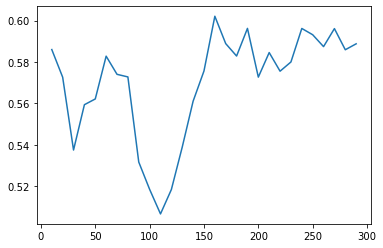

0.602061191626409
160


In [59]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x_full, cook_time, k_val=k)
    rfc_mutual_info = RandomForestClassifier(random_state=0)
    scores = evaluate_model(x_train_fs, cook_time, rfc_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 160

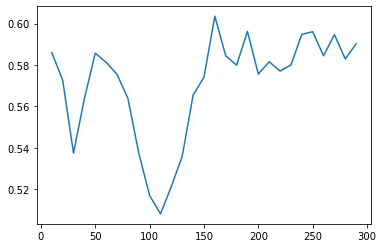

0.6035104669887279
160


In [60]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x2, y2, k_val=k)
    rfc_mutual_info = RandomForestClassifier(random_state=0)
    scores = evaluate_model(x_train_fs, y2, rfc_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 160

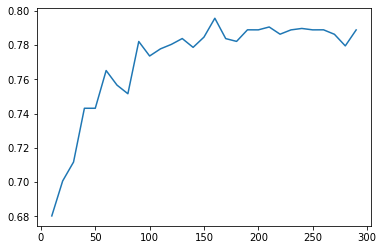

0.7956832197338528
160


In [61]:
# resampled
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=k)
    rfc_mutual_info = RandomForestClassifier(random_state=0)
    scores = evaluate_model(x_train_fs, y_resampled, rfc_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 160

#### Multinomial Naive Bayes

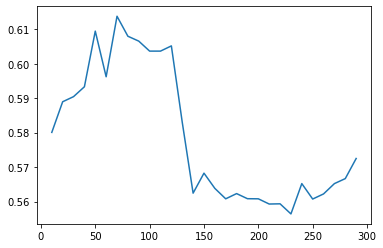

0.6137520128824475
70


In [62]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x_full, cook_time, k_val=k)
    clf_mutual_info = MultinomialNB()
    scores = evaluate_model(x_train_fs, cook_time, clf_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 100

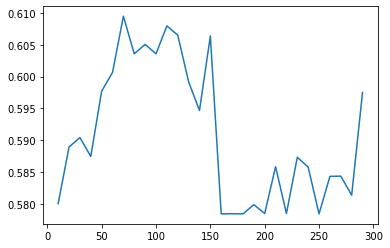

0.6094685990338163
70


In [63]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x2, y2, k_val=k)
    clf_mutual_info = MultinomialNB()
    scores = evaluate_model(x_train_fs, y2, clf_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 100

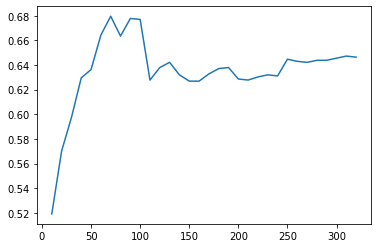

0.6795304554798226
70


In [64]:
# resampled
k_vals2 = list(np.arange(322, step=10))
acc = []
for k in k_vals2:
    x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=k)
    clf_mutual_info = MultinomialNB()
    scores = evaluate_model(x_train_fs, y_resampled, clf_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals2, acc)
plt.show()
print(max(acc[1:]))
print(k_vals2[acc.index(max(acc[1:]))])
#best k = 70

#### SVM

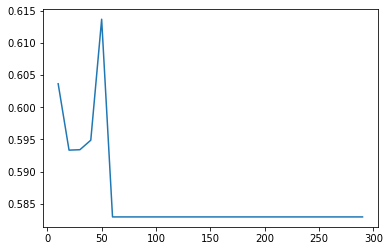

0.613719806763285
50


In [65]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x_full, cook_time, k_val=k)
    svm_mutual_info = SVC(random_state=0)
    scores = evaluate_model(x_train_fs, cook_time, svm_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 50

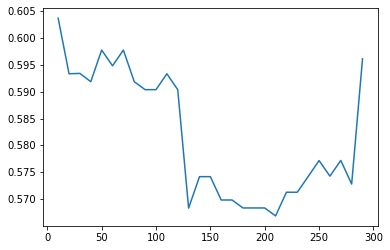

0.6036714975845411
10


In [66]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_mutual_info(x2, y2, k_val=k)
    svm_mutual_info = SVC(random_state=0)
    scores = evaluate_model(x_train_fs, y2, svm_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 10

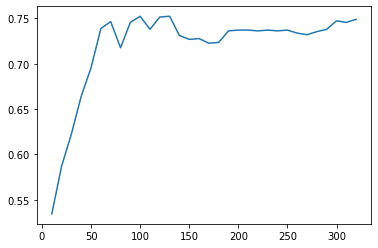

0.7524288650870931
130


In [67]:
# resampled
acc = []
for k in k_vals2:
    x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=k)
    svm_mutual_info = SVC(random_state=0)
    scores = evaluate_model(x_train_fs, y_resampled, svm_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals2, acc)
plt.show()
print(max(acc[1:]))
print(k_vals2[acc.index(max(acc[1:]))])
#best k = 130

### Chi-square

In [68]:
from sklearn.feature_selection import chi2
def select_features_chi2(X_train, Y_train, k_val):
    fs = SelectKBest(score_func=chi2, k=k_val)
    fs.fit(X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    # X_test_fs = fs.transform(X_test)
    return X_train_fs, fs

#### Logistic regression

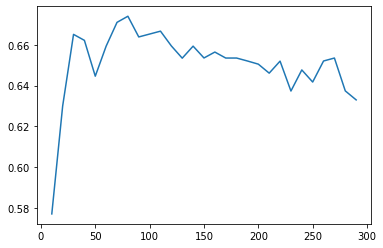

0.673977455716586
80


In [69]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x_full, cook_time, k_val=k)
    lr_mutual_info = LogisticRegression()
    scores = evaluate_model(x_train_fs, cook_time, lr_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best is k=80

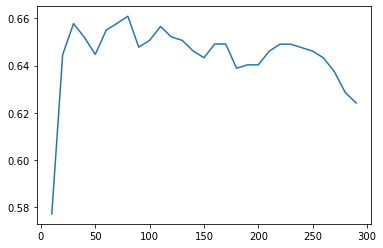

0.6609339774557165
80


In [70]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x2, y2, k_val=k)
    lr_mutual_info = LogisticRegression()
    scores = evaluate_model(x_train_fs, y2, lr_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 80

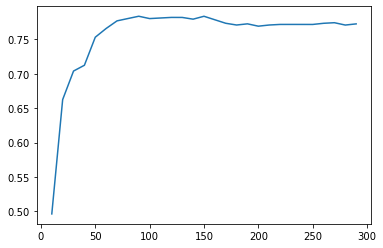

0.783760683760684
90


In [71]:
# resampled 
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=k)
    lr_mutual_info = LogisticRegression()
    scores = evaluate_model(x_train_fs, y_resampled, lr_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 90

#### Random forest

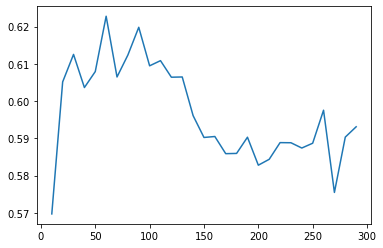

0.6227697262479871
60


In [72]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x_full, cook_time, k_val=k)
    rfc_mutual_info = RandomForestClassifier(random_state=0)
    scores = evaluate_model(x_train_fs, cook_time, rfc_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 60

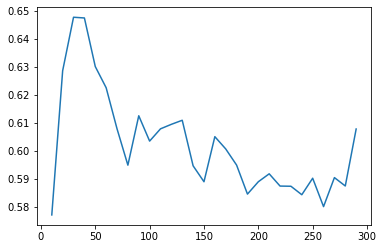

0.6477294685990337
30


In [73]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x2, y2, k_val=k)
    rfc_mutual_info = RandomForestClassifier(random_state=0)
    scores = evaluate_model(x_train_fs, y2, rfc_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
# best k = 30

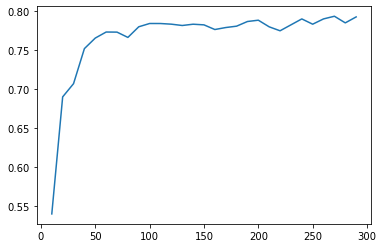

0.7930974791734288
270


In [74]:
# resampled
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=k)
    rfc_mutual_info = RandomForestClassifier(random_state=0)
    scores = evaluate_model(x_train_fs, y_resampled, rfc_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k =270

#### Multinomial Naive Bayes

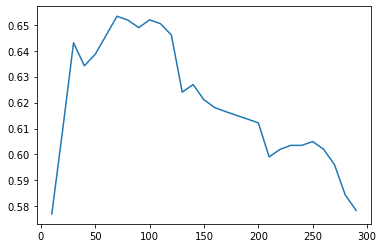

0.6532689210950079
70


In [75]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x_full, cook_time, k_val=k)
    clf_mutual_info = MultinomialNB()
    scores = evaluate_model(x_train_fs, cook_time, clf_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 70

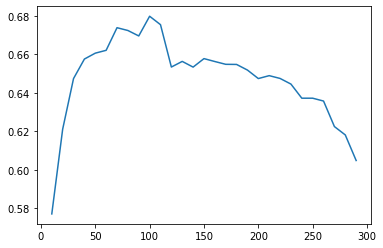

0.6798711755233493
100


In [76]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x2, y2, k_val=k)
    clf_mutual_info = MultinomialNB()
    scores = evaluate_model(x_train_fs, y2, clf_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 100

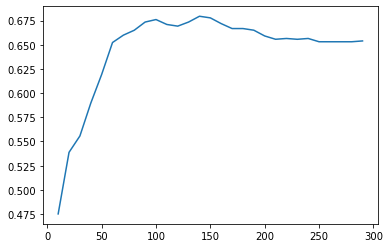

0.6794763604890188
140


In [77]:
# resampled
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=k)
    clf_mutual_info = MultinomialNB()
    scores = evaluate_model(x_train_fs, y_resampled, clf_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 140

#### SVM

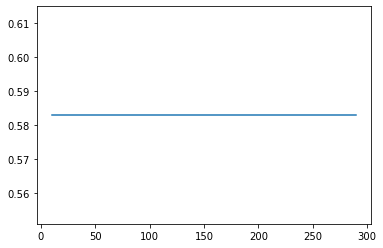

0.5829307568438004
10


In [78]:
# original
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x_full, cook_time, k_val=k)
    svm_mutual_info = SVC(random_state=0)
    scores = evaluate_model(x_train_fs, cook_time, svm_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])

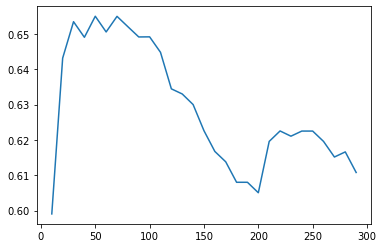

0.6550080515297906
50


In [79]:
# post-trans
acc = []
for k in k_vals:
    x_train_fs, fs = select_features_chi2(x2, y2, k_val=k)
    svm_mutual_info = SVC(random_state=0)
    scores = evaluate_model(x_train_fs, y2, svm_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])
#best k = 50

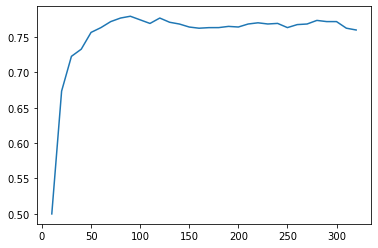

0.7794979984853403
90


In [80]:
# resampled
acc = []
for k in k_vals2:
    x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=k)
    svm_mutual_info = SVC(random_state=0)
    scores = evaluate_model(x_train_fs, y_resampled, svm_mutual_info)
    acc.append(mean(scores))
plt.plot(k_vals2, acc)
plt.show()
print(max(acc[1:]))
print(k_vals2[acc.index(max(acc[1:]))])
#best k = 90

### Model tuning

We are going to tune the best models we achieve so far. Moreover, we are also trying out a stacking model out of these best models and evaluate the performances.

#### FS_RESAMPLED_LR

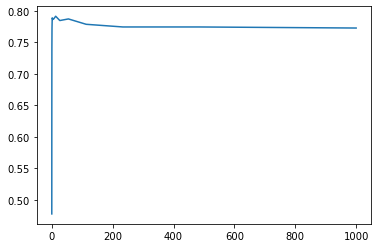

0.79143135345667
12.742749857031322


In [81]:
# chi2 feature selection
x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=90)
acc = []
C = np.logspace(-3,3,20)
for c in C:
    lr = LogisticRegression(C=c, max_iter=500)
    # C = 12.742749857031322
    scores = evaluate_model(x_train_fs, y_resampled, lr)
    acc.append(mean(scores))

plt.plot(C, acc)
plt.show()
print(max(acc[1:]))
print(C[acc.index(max(acc[1:]))])

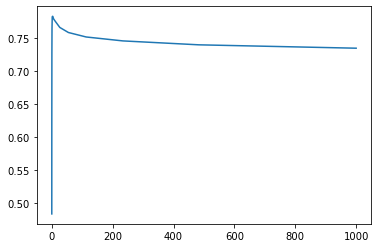

0.7828843449096614
2.976351441631316


In [82]:
# mutual_info feature selection
x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=230)
acc = []
C = np.logspace(-3,3,20)
for c in C:
    lr = LogisticRegression(C=c, max_iter=500)
    # C = 2.976351441631316
    scores = evaluate_model(x_train_fs, y_resampled, lr)
    acc.append(mean(scores))

plt.plot(C, acc)
plt.show()
print(max(acc))
print(C[acc.index(max(acc))])

#### FS_RESAMPLED_SVM

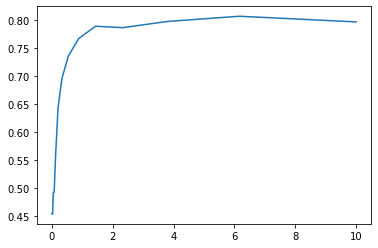

0.8075516607162178
6.158482110660261


In [83]:
x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=90)
acc = []
C = np.logspace(-3, 1, 20)
for c in C:
    svc = SVC(C=c)
    # C = 6.158482110660261
    scores = evaluate_model(x_train_fs, y_resampled, svc)
    acc.append(mean(scores))

plt.plot(C, acc)
plt.show()
print(max(acc))
print(C[acc.index(max(acc))])

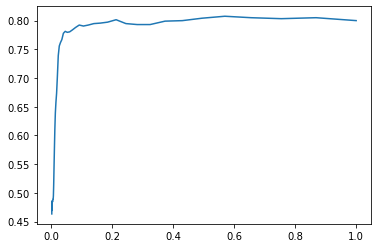

0.8075516607162178
0.5689866029018293


In [84]:
acc = []
gamma = np.logspace(-3, 0, 50)
for g in gamma:
    svc = SVC(random_state=0, C=6.158482110660261,gamma = g)
    # gamma = 0.3727593720314938
    scores = evaluate_model(x_train_fs, y_resampled, svc)
    acc.append(mean(scores))

plt.plot(gamma, acc)
plt.show()
print(max(acc))
print(gamma[acc.index(max(acc))])

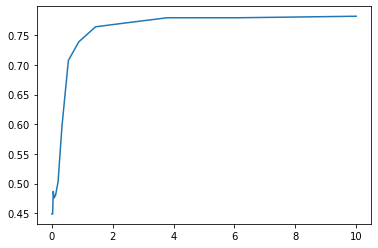

0.7820729200476038
10.0


In [85]:
x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=130)
acc = []
C = np.logspace(-3, 1, 20)
for c in C:
    svc = SVC(C=c)
    # C = 10.0
    scores = evaluate_model(x_train_fs, y_resampled, svc)
    acc.append(mean(scores))

plt.plot(C, acc)
plt.show()
print(max(acc))
print(C[acc.index(max(acc))])

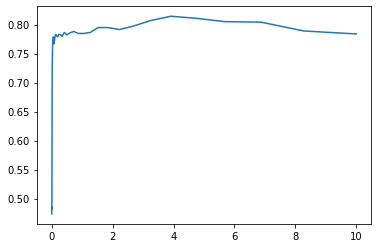

0.8143459915611815
3.906939937054613


In [86]:
acc = []
gamma = np.logspace(-3, 1, 50)
for g in gamma:
    svc = SVC(random_state=0, C=10.0,gamma = g)
    # gamma = 0.1206792640639329
    scores = evaluate_model(x_train_fs, y_resampled, svc)
    acc.append(mean(scores))

plt.plot(gamma, acc)
plt.show()
print(max(acc))
print(gamma[acc.index(max(acc))])

#### FS_RESAMPLED_MULTBAYES

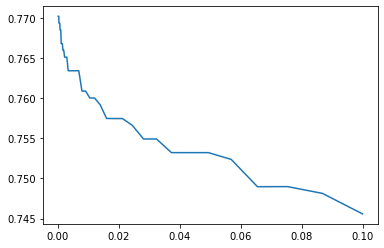

0.7701828410689172
0.0001


In [87]:
x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=140)
acc = []
alpha = np.logspace(-4, -1, 50)
for a in alpha:
    mulb = MultinomialNB(alpha=a)
    # alpha=0.0001
    scores = evaluate_model(x_train_fs, y_resampled, mulb)
    acc.append(mean(scores))

plt.plot(alpha, acc)
plt.show()
print(max(acc))
print(alpha[acc.index(max(acc))])

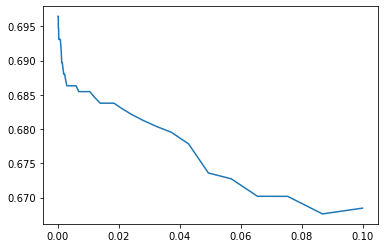

0.6964621876014282
0.0001


In [88]:
x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=140)
acc = []
alpha = np.logspace(-4, -1, 50)
for a in alpha:
    mulb = MultinomialNB(alpha=a)
    # alpha = 0.05689866029018293
    scores = evaluate_model(x_train_fs, y_resampled, mulb)
    acc.append(mean(scores))

plt.plot(alpha, acc)
plt.show()
print(max(acc))
print(alpha[acc.index(max(acc))])

#### FS_RESAMPLED_RFC

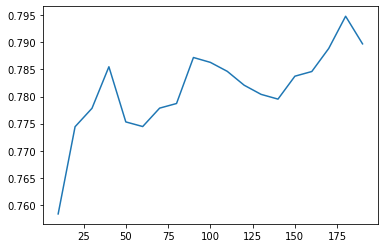

0.7948285188791518
180


In [89]:
x_train_fs, fs = select_features_mutual_info(X_resampled, y_resampled, k_val=270)
acc = []
n_est = np.arange(start=10, stop = 200, step=10)
for n in n_est:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    # n_est=180
    scores = evaluate_model(x_train_fs, y_resampled, rf)
    acc.append(mean(scores))

plt.plot(n_est, acc)
plt.show()
print(max(acc))
print(n_est[acc.index(max(acc))])

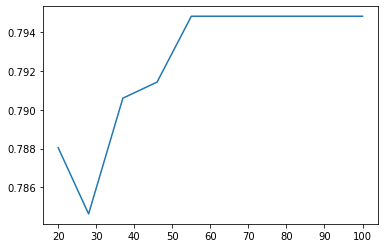

0.7948285188791518
55


In [90]:
acc = []
max_depth = [int(x) for x in np.linspace(20, 100, num = 10)]
for m in max_depth:
    rf = RandomForestClassifier(n_estimators=180, random_state=0, max_depth=m)
    # max_depth = 55
    scores = evaluate_model(x_train_fs, y_resampled, rf)
    acc.append(mean(scores))

plt.plot(max_depth, acc)
plt.show()
print(max(acc))
print(max_depth[acc.index(max(acc))])

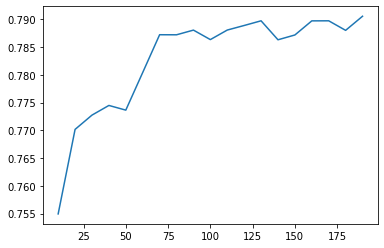

0.7905550146056477
190


In [91]:
x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=190)
acc = []
n_est = np.arange(start=10, stop = 200, step=10)
for n in n_est:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    # n_est=190
    scores = evaluate_model(x_train_fs, y_resampled, rf)
    acc.append(mean(scores))

plt.plot(n_est, acc)
plt.show()
print(max(acc))
print(n_est[acc.index(max(acc))])

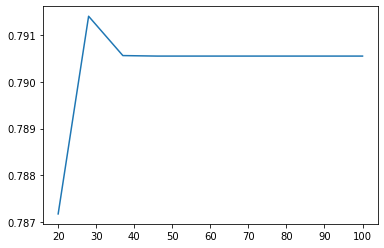

0.7914097154603486
28


In [92]:
acc = []
max_depth = [int(x) for x in np.linspace(20, 100, num = 10)]
for m in max_depth:
    rf = RandomForestClassifier(n_estimators=190, random_state=0, max_depth=m)
    # max_depth = 37
    scores = evaluate_model(x_train_fs, y_resampled, rf)
    acc.append(mean(scores))

plt.plot(max_depth, acc)
plt.show()
print(max(acc))
print(max_depth[acc.index(max(acc))])

### Stacking models

In [93]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline

In [94]:
# models with individual feature selection threshold stacked together
models = [
    ('lr', make_pipeline(SelectKBest(score_func=chi2, k=120), LogisticRegression(C=2.976351441631316, max_iter=500) )),
    ('svm', make_pipeline(SelectKBest(score_func=chi2, k=70), SVC(random_state=0, C=3.792690190732246,gamma = 0.3727593720314938) )), 
    ('mulb', make_pipeline(SelectKBest(score_func=chi2, k=150), MultinomialNB(alpha=0.0001) )),
    ('rfc', make_pipeline(SelectKBest(score_func=chi2, k=250), RandomForestClassifier(n_estimators=70, random_state=0, max_depth=20) ))]

level1 = LogisticRegression()
stacking = StackingClassifier(estimators=models, final_estimator=level1, cv=5)
scores = evaluate_model(X_resampled, y_resampled, stacking)
mean(scores)

0.773580006491399

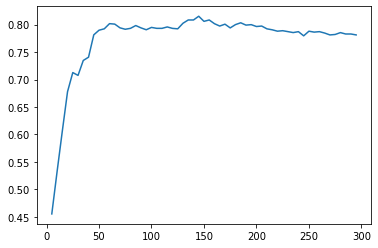

0.8150925024342747
145


In [97]:
# models with a common feature selection threshold stacked together
models = [
    ('lr', LogisticRegression(C=12.742749857031322, max_iter=500) ),
    ('svm', SVC(random_state=0, C=6.158482110660261,gamma = 0.5689866029018293) ), 
    ('mulb', MultinomialNB(alpha=0.0001) ),
    ('rfc', RandomForestClassifier(n_estimators=190, random_state=0, max_depth=28) )]

acc = []
k_vals = np.arange(300, step=5)
for k in k_vals:
    x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=k)
    stacking = StackingClassifier(estimators=models, final_estimator=level1, cv=5)
    scores = evaluate_model(x_train_fs, y_resampled, stacking)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])

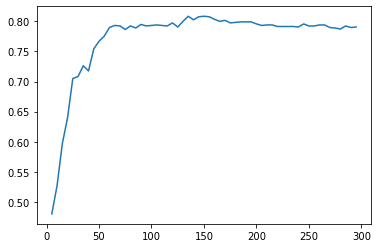

0.8083630855782754
150


In [98]:
# models with a common feature selection threshold stacked together
models = [
    ('svm', SVC(random_state=0, C=6.158482110660261,gamma = 0.06866488450043001) ), 
    ('mulb', MultinomialNB(alpha=0.0001) )]

acc = []
k_vals = np.arange(300, step=5)
for k in k_vals:
    x_train_fs, fs = select_features_chi2(X_resampled, y_resampled, k_val=k)
    stacking = StackingClassifier(estimators=models, final_estimator=level1, cv=5)
    scores = evaluate_model(x_train_fs, y_resampled, stacking)
    acc.append(mean(scores))
plt.plot(k_vals, acc)
plt.show()
print(max(acc[1:]))
print(k_vals[acc.index(max(acc[1:]))])